In [231]:
import os
import random

from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from collections import Counter
from pyvis.network import Network
import networkx as nx
import numpy as np

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 1: Load the data 載入資料</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Dataset Information 資料集資訊</div>

# PTT AI 討論資料集介紹

## 資料集概覽

此資料集包含有關 AI 的討論，收集自台灣的社群媒體平台 PTT。資料收集範圍從 2022 年 1 月 1 日到 2024 年 5 月 31 日，共包含 2,172 筆資料。

## 資料欄位說明

資料集包含以下 11 個欄位：

1. `system_id`: 系統編號，總共 2172 筆，無空值。
2. `artComment`: 文章評論，總共 2172 筆，無空值。
3. `artDate`: 文章日期，總共 2172 筆，無空值。
4. `insertedDate`: 插入日期，總共 2172 筆，無空值。
5. `artContent`: 文章內容，總共 2172 筆，無空值。
6. `artCatagory`: 文章類別，總共 2172 筆，無空值。
7. `dataSource`: 資料來源，總共 2172 筆，無空值，全部來自 PTT。
8. `artPoster`: 發文者，總共 2172 筆，無空值。
9. `artTitle`: 文章標題，總共 2172 筆，無空值。
10. `artUrl`: 文章網址，總共 2172 筆，無空值。

## 記憶體使用情況

- 資料集大小： 186.8+ KB
- 資料型態：整數 (int64) 1 欄，物件 (object) 9 欄

In [232]:
df = pd.read_csv('data/ptt_ai_221130to240531.csv')
df.head()

system_id                                                  artUrl  \
0          1  https://www.ptt.cc/bbs/Finance/M.1644917373.A.F79.html   
1          2  https://www.ptt.cc/bbs/Finance/M.1653071365.A.E8A.html   
2          3  https://www.ptt.cc/bbs/Finance/M.1676346325.A.D3A.html   
3          4  https://www.ptt.cc/bbs/Finance/M.1698684536.A.B28.html   
4          5      https://www.ptt.cc/bbs/job/M.1641165773.A.E67.html   

                    artTitle              artDate     artPoster artCatagory  \
0    [徵才]普匯金融科技-金融科技行銷/金融實習生  2022-02-15 17:29:30         ggglu     Finance   
1        [新聞]台銀「三駕馬車」戰略發威前4月  2022-05-21 02:29:23      make1302     Finance   
2            [新聞]央行徵才月薪最高86K  2023-02-14 11:45:19      kria5304     Finance   
3  [新聞]證交所徵才開創數位驅動時代報名至11/17  2023-10-31 00:48:54  BangBang5566     Finance   
4      [台中][西屯］飛斯戴爾有限公司/日文客服  2022-01-03 07:22:51       howdigh         job   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            artContent  \
0                                                                                                                                                                                                                                                                                                                                         【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fintech Marketing Intern/ Fiance Intern\n【徵求條件】\n1.商管相關科系或曾經接觸相關Fintech領域\n2.關注時事議題，對國內外金融科技趨勢議題有興趣\n3.熟悉 Office 軟體、社群軟體，具圖文影音創作能力者額外加分\n4.具 Adobe illustrator / Adobe Photoshop / Adobe Premiere 經驗者額外加分\n5.有操作過線上／線下行銷活動或自媒體經營經驗者額外加分\n\n【薪資待遇】實習168元/hr\n【連絡方式】104投遞履歷\n【工作地點】台北市中山區松江路111號11樓之1\n【工作時間】一週三天（可議）09:00~12:30 13:30~18:00（午休一小時）\n【工作內容】\n1.Mentor指導協助廣告投放\n2.社群經營包含圖文撰寫\n3.Fintech 行銷及產品提案與執行\n4.市場數據蒐集與分析\n\n【公司福利】三節獎品\n【其他備註】公司簡介（\nhttps://bit.ly/3JsFOAP\n）\n普匯金融科技由具備多年專業風險管理、金融產品設計及高端科技團隊組成，提供互利互\n信、公開透明、有溫度的金融服務，立志串起社會閒置資源，協助年輕人完成夢想的金融\n新平台。\n我們是一支最具「速度、紀律、績效」的團隊，邀請您一起加入開創年輕化的移動金融服\n務，共同邁向國際舞台，創立AI金融科技獨角獸！\n我們在做：\n1.利用高端科技P2P、AI人工智慧、區塊鏈技術，提供個人、中小企業、汽車融資等線上\n借貸及債權投資媒合服務\n2.創新開發金融產品\n3.跨業策略聯盟與AI金融科技聯盟\n4.合作台大兒童健康基金會並由張鈞甯擔任公益大使舉辦聯合勸募捐款社會公益\n\n心動了嗎？趕緊上104投遞履歷吧！\n→\nhttps://bit.ly/3gFz5r9   
1  （中央社記者張璦台北20日電）台灣銀行消金、企金、政府部門業務「三駕馬車」再發威\n，董事長呂桔誠今天表示，台銀今年前4月稅前淨利達新台幣54億元，加上政策性負擔，\n總額來到85億元，已達年度預算數52%。\n\n台灣銀行經濟金融論文獎頒獎典暨經濟研究所揭牌儀式今天登場，呂桔誠、總統府資政陳\n博志等人出席。\n\n呂桔誠接受媒體聯訪時指出，台銀今年1至4月稅前淨利達54億元，若加上政策性負擔31億\n元，總額更來到85億元，「已達年度預算數52%」；成長動能來自「三駕馬車」（Troika\n），即消費者金融、企業金融與政府部門放款業務，均衡發展。\n\n呂桔誠指出，其中，成長最多的是消金，到今年3月底餘額突破1兆1000億元，主要來自房\n貸業務，承作方向多為首購、一房、青安、築巢優利貸等，目前新承作中，首購、一房占\n約95%。\n\n金融科技研發方面，呂桔誠表示，5年多來台銀金融科技專利件數持續增加，到今年4月底\n，累計申請數為399件，355件通過核准，且其中50件是門檻較高的發明專利，橫跨資訊處\n、資安處、數位金融部、貴金屬部等，顯見研發量能在台銀內發酵。\n\n呂桔誠致詞時表示，台銀成立至今123年，作為台灣領導銀行，擔任關鍵金融樞紐，台銀\n從日治時代開始針對經濟研究投入相當多心力，從農林漁牧產業到工業發展，再到最近30\n年著重經濟研究，最近10年則重視金融研究。\n\n呂桔誠說，6年前透過台銀這一品牌創立論文獎，鼓勵年輕研究人員，也體現台銀企業社\n會責任提升到學術層面；此外，在520行慶，台銀迎來新里程碑，經濟研究處正式升格為\n經濟研究所，盼藉以提升財經研究水平。\n\n呂桔誠指出，台銀經濟研究所目前有21名人員，未來將

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   system_id     2172 non-null   int64 
 1   artUrl        2172 non-null   object
 2   artTitle      2172 non-null   object
 3   artDate       2172 non-null   object
 4   artPoster     2172 non-null   object
 5   artCatagory   2172 non-null   object
 6   artContent    2172 non-null   object
 7   artComment    2172 non-null   object
 8   e_ip          2126 non-null   object
 9   insertedDate  2172 non-null   object
 10  dataSource    2172 non-null   object
dtypes: int64(1), object(10)
memory usage: 186.8+ KB


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Load the font 載入字型</div>

In [234]:
# Path to the custom font
font_path = 'font/TraditionalChinese.ttf'

# Add the custom font to the font manager
font_manager.fontManager.addfont(font_path)

# After adding the font, search for it by filename to get the correct font name
for font in font_manager.fontManager.ttflist:
    if font.fname == font_path:
        print(f"Found font: {font.name}")
        plt.rcParams['font.family'] = font.name
        break

Found font: Noto Sans TC


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 2: Data Preprocessing 資料前處理</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Data Cleaning 資料清理</div>

In [293]:
# 複製原始資料集
clear_df = df.copy()

#去除本次不會用到的欄位
drop_cols = ['system_id', 'artTitle', 'artCatagory', 'dataSource', 'insertedDate']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','，', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df.head(10)

artUrl  \
0  https://www.ptt.cc/bbs/Finance/M.1644917373.A.F79.html   
1  https://www.ptt.cc/bbs/Finance/M.1653071365.A.E8A.html   
2  https://www.ptt.cc/bbs/Finance/M.1676346325.A.D3A.html   
3  https://www.ptt.cc/bbs/Finance/M.1698684536.A.B28.html   
4      https://www.ptt.cc/bbs/job/M.1641165773.A.E67.html   
5      https://www.ptt.cc/bbs/job/M.1641369547.A.B96.html   
6      https://www.ptt.cc/bbs/job/M.1642053918.A.308.html   
7      https://www.ptt.cc/bbs/job/M.1642382909.A.5D7.html   
8      https://www.ptt.cc/bbs/job/M.1642668761.A.F44.html   
9      https://www.ptt.cc/bbs/job/M.1642761016.A.4BA.html   

               artDate     artPoster  \
0  2022-02-15 17:29:30         ggglu   
1  2022-05-21 02:29:23      make1302   
2  2023-02-14 11:45:19      kria5304   
3  2023-10-31 00:48:54  BangBang5566   
4  2022-01-03 07:22:51       howdigh   
5  2022-01-05 15:59:05     cakelover   
6  2022-01-13 14:05:16     qhorohoro   
7  2022-01-17 09:28:27     catty0310   
8  2022-01-20 16:52:39          trpw   
9  2022-01-21 18:30:13    GhostGrace   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           artContent  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fintech Marketing Intern/ Fiance Intern\n【徵求條件】\n1.商管相關科系或曾經接觸相關Fintech領域\n2.關注時事議題，對國內外金融科技趨勢議題有興趣\n3.熟悉 Off

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Deal with Comments 處理留言</div>

In [294]:
tqdm.pandas()

# 處理某篇文章的所有留言（取出留言者與狀態）
def get_comment_info(com):
  commenters,comment_status = [],[]
  com = eval(com)
  for i in com:
    commenters.append(i['cmtPoster'])
    comment_status.append(i['cmtStatus'])
  return pd.Series([commenters, comment_status])

# 將留言者與狀態分開
clear_df[['commenters', 'comment_status']] = clear_df['artComment'].apply(get_comment_info)
clear_df.head()

artUrl  \
0  https://www.ptt.cc/bbs/Finance/M.1644917373.A.F79.html   
1  https://www.ptt.cc/bbs/Finance/M.1653071365.A.E8A.html   
2  https://www.ptt.cc/bbs/Finance/M.1676346325.A.D3A.html   
3  https://www.ptt.cc/bbs/Finance/M.1698684536.A.B28.html   
4      https://www.ptt.cc/bbs/job/M.1641165773.A.E67.html   

               artDate     artPoster  \
0  2022-02-15 17:29:30         ggglu   
1  2022-05-21 02:29:23      make1302   
2  2023-02-14 11:45:19      kria5304   
3  2023-10-31 00:48:54  BangBang5566   
4  2022-01-03 07:22:51       howdigh   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            artContent  \
0                                                                                                                                                                                                                                                                                                                                         【實習】\n【公司名稱】Influx FinTech 普匯金融科技\n\n【工作職缺】Fintech Marketing Intern/ Fiance Intern\n【徵求條件】\n1.商管相關科系或曾經接觸相關Fintech領域\n2.關注時事議題，對國內外金融科技趨勢議題有興趣\n3.熟悉 Office 軟體、社群軟體，具圖文影音創作能力者額外加分\n4.具 Adobe illustrator / Adobe Photoshop / Adobe Premiere 經驗者額外加分\n5.有操作過線上／線下行銷活動或自媒體經營經驗者額外加分\n\n【薪資待遇】實習168元/hr\n【連絡方式】104投遞履歷\n【工作地點】台北市中山區松江路111號11樓之1\n【工作時間】一週三天（可議）09:00~12:30 13:30~18:00（午休一小時）\n【工作內容】\n1.Mentor指導協助廣告投放\n2.社群經營包含圖文撰寫\n3.Fintech 行銷及產品提案與執行\n4.市場數據蒐集與分析\n\n【公司福利】三節獎品\n【其他備註】公司簡介（\nhttps://bit.ly/3JsFOAP\n）\n普匯金融科技由具備多年專業風險管理、金融產品設計及高端科技團隊組成，提供互利互\n信、公開透明、有溫度的金融服務，立志串起社會閒置資源，協助年輕人完成夢想的金融\n新平台。\n我們是一支最具「速度、紀律、績效」的團隊，邀請您一起加入開創年輕化的移動金融服\n務，共同邁向國際舞台，創立AI金融科技獨角獸！\n我們在做：\n1.利用高端科技P2P、AI人工智慧、區塊鏈技術，提供個人、中小企業、汽車融資等線上\n借貸及債權投資媒合服務\n2.創新開發金融產品\n3.跨業策略聯盟與AI金融科技聯盟\n4.合作台大兒童健康基金會並由張鈞甯擔任公益大使舉辦聯合勸募捐款社會公益\n\n心動了嗎？趕緊上104投遞履歷吧！\n→\nhttps://bit.ly/3gFz5r9   
1  （中央社記者張璦台北20日電）台灣銀行消金、企金、政府部門業務「三駕馬車」再發威\n，董事長呂桔誠今天表示，台銀今年前4月稅前淨利達新台幣54億元，加上政策性負擔，\n總額來到85億元，已達年度預算數52%。\n\n台灣銀行經濟金融論文獎頒獎典暨經濟研究所揭牌儀式今天登場，呂桔誠、總統府資政陳\n博志等人出席。\n\n呂桔誠接受媒體聯訪時指出，台銀今年1至4月稅前淨利達54億元，若加上政策性負擔31億\n元，總額更來到85億元，「已達年度預算數52%」；成長動能來自「三駕馬車」（Troika\n），即消費者金融、企業金融與政府部門放款業務，均衡發展。\n\n呂桔誠指出，其中，成長最多的是消金，到今年3月底餘額突破1兆1000億元，主要來自房\n貸業務，承作方向多為首購、一房、青安、築巢優利貸等，目前新承作中，首購、一房占\n約95%。\n\n金融科技研發方面，呂桔誠表示，5年多來台銀金融科技專利件數持續增加，到今年4月底\n，累計申請數為399件，355件通過核准，且其中50件是門檻較高的發明專利，橫跨資訊處\n、資安處、數位金融部、貴金屬部等，顯見研發量能在台銀內發酵。\n\n呂桔誠致詞時表示，台銀成立至今123年，作為台灣領導銀行，擔任關鍵金融樞紐，台銀\n從日治時代開始針對經濟研究投入相當多心力，從農林漁牧產業到工業發展，再到最近30\n年著重經濟研究，最近10年則重視金融研究。\n\n呂桔誠說，6年前透過台銀這一品牌創立論文獎，鼓勵年輕研究人員，也體現台銀企業社\n會責任提升到學術層面；此外，在520行慶，台銀迎來新里程碑，經濟研究處正式升格為\n經濟研究所，盼藉以提升財經研究水平。\n\n呂桔誠指出，台銀經濟研究所目前有21名人員，未來將擴編、增設副所長，至於人選是否\n內調，他表示，「希望有新的能量」挹注。\n\n陳博志致詞時說，台銀是「百年老店」，同時也是先進的金融業者，不斷為台灣進行財經\n相關研究；諾貝爾經濟學獎得主史提格里茲（Joseph Stiglitz）日前說，疫情和俄烏戰\n爭是21世紀走向的轉捩點，但其實經濟自由化思維改變，以及物聯網（IoT）、人工智慧\n（AI）等科技變革，同樣改變整個世界格局，對經研人才而言，是挑戰也是機會 。\n\n台銀2017年起辦理「台灣銀行經濟金融論文獎」，提升台灣豐沛經濟金融研究量能，今年\n徵稿活動則自即日起開跑至12月30日，總獎金高達97萬元，歡迎有興趣者踴躍參與。（編\n輯：蘇志宗）1110520\nhttps://www.cna.com.tw/amp/news/

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Explode the DataFrame 展開資料</div>

In [295]:
# 展開留言者與狀態
clear_df = clear_df.explode(['commenters', 'comment_status'])

social_df = clear_df[['artPoster','artUrl','commenters','comment_status']]

social_df.reset_index(drop=True, inplace=True)

social_df.head()

,artPoster,artUrl,commenters,comment_status
0,ggglu,https://www.ptt.cc/bbs/Finance/M.1644917373.A.F79.html,cow38,噓
1,ggglu,https://www.ptt.cc/bbs/Finance/M.1644917373.A.F79.html,IKnowWhy,噓
2,ggglu,https://www.ptt.cc/bbs/Finance/M.1644917373.A.F79.html,z6112539,噓
3,ggglu,https://www.ptt.cc/bbs/Finance/M.1644917373.A.F79.html,blackfire,噓
4,make1302,https://www.ptt.cc/bbs/Finance/M.1653071365.A.E8A.html,DerLuna,推


In [296]:
social_df['comment_status'].value_counts()

comment_status
推    63199
→    53625
噓    10843
Name: count, dtype: int64

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Analysis of the Document Comment Amount 文章留言數量分析</div>

In [297]:
top_comments_df = social_df.groupby('artUrl')['commenters'].count().sort_values(ascending=False)
top_comments_df.head(10)

artUrl
https://www.ptt.cc/bbs/Stock/M.1701225874.A.73E.html       1235
https://www.ptt.cc/bbs/Stock/M.1703159179.A.E08.html       1061
https://www.ptt.cc/bbs/Stock/M.1713712740.A.E47.html        715
https://www.ptt.cc/bbs/Tech_Job/M.1685688709.A.54B.html     713
https://www.ptt.cc/bbs/Stock/M.1689653411.A.231.html        516
https://www.ptt.cc/bbs/Stock/M.1691590964.A.313.html        499
https://www.ptt.cc/bbs/Tech_Job/M.1699485847.A.546.html     482
https://www.ptt.cc/bbs/Tech_Job/M.1677244332.A.87C.html     470
https://www.ptt.cc/bbs/Stock/M.1695112441.A.C61.html        439
https://www.ptt.cc/bbs/Stock/M.1691634339.A.FC5.html        437
Name: commenters, dtype: int64

可見有些文章的留言數量非常多，這些文章可能是熱門話題。

In [298]:
# 只取留言數量前 10 文章
social_df_top = social_df[social_df['artUrl'].isin(top_comments_df.head(10).index)]

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 3: Network Analysis Of Users and Articles 使用者與文章的網路分析</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Filter the Data 篩選資料</div>

In [299]:
def get_top_users(modify_df, n=30):
    user_count = Counter(modify_df['artPoster'].tolist() * 10 + modify_df['commenters'].tolist())
    top_users = {user for user, count in user_count.most_common(n)}
    return modify_df[modify_df['artPoster'].isin(top_users) & modify_df['commenters'].isin(top_users)]

# Filter edges to include only interactions between top users
top_filtered_df = get_top_users(social_df_top, n=500)

top_filtered_df.head()

,artPoster,artUrl,commenters,comment_status
42677,hvariables,https://www.ptt.cc/bbs/Stock/M.1689653411.A.231.html,O10lOl01O,→
42679,hvariables,https://www.ptt.cc/bbs/Stock/M.1689653411.A.231.html,Kobe5210,推
42683,hvariables,https://www.ptt.cc/bbs/Stock/M.1689653411.A.231.html,tomdavis,推
42684,hvariables,https://www.ptt.cc/bbs/Stock/M.1689653411.A.231.html,jinx5566,→
42685,hvariables,https://www.ptt.cc/bbs/Stock/M.1689653411.A.231.html,deepdish,噓


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Transform the Data 轉換資料</div>

In [300]:
# 留言者對文章，狀態為 weight
re_df = top_filtered_df[['commenters','artUrl','comment_status']].rename(columns = {'commenters':'src','artUrl':'dis','comment_status':'weight'})
re_df = re_df[~re_df['src'].isna()]
re_df.head()

,src,dis,weight
42677,O10lOl01O,https://www.ptt.cc/bbs/Stock/M.1689653411.A.231.html,→
42679,Kobe5210,https://www.ptt.cc/bbs/Stock/M.1689653411.A.231.html,推
42683,tomdavis,https://www.ptt.cc/bbs/Stock/M.1689653411.A.231.html,推
42684,jinx5566,https://www.ptt.cc/bbs/Stock/M.1689653411.A.231.html,→
42685,deepdish,https://www.ptt.cc/bbs/Stock/M.1689653411.A.231.html,噓


In [301]:
def convert_status(s):
  if s == '推':
    return 2
  elif s == '→':
    return 1
  else :
    return -1
  
re_df['weight'] = re_df['weight'].map(convert_status)

# 計算某位留言者對某篇文章的總分數
re_df = re_df.groupby(['src','dis']).sum().reset_index()
re_df

,src,dis,weight
0,AGODC,https://www.ptt.cc/bbs/Stock/M.1695112441.A.C61.html,3
1,AGODC,https://www.ptt.cc/bbs/Stock/M.1701225874.A.73E.html,6
2,AGODC,https://www.ptt.cc/bbs/Tech_Job/M.1699485847.A.546.html,2
3,AirLee,https://www.ptt.cc/bbs/Stock/M.1713712740.A.E47.html,3
4,AirLee,https://www.ptt.cc/bbs/Tech_Job/M.1685688709.A.54B.html,4
...,...,...,...
841,zxcv91039,https://www.ptt.cc/bbs/Stock/M.1703159179.A.E08.html,5
842,zxcv91039,https://www.ptt.cc/bbs/Tech_Job/M.1699485847.A.546.html,2
843,zzzzzzzzzzzy,https://www.ptt.cc/bbs/Stock/M.1695112441.A.C61.html,2
844,zzzzzzzzzzzy,https://www.ptt.cc/bbs/Stock/M.1701225874.A.73E.html,-1


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Create the Network for users and articles 建立使用者與文章的網路</div>

In [302]:
# 設定分數低的為紅色
def get_color(w):
  if w>0:
    return 'green'
  else:
    return 'red'
  
re_df['color'] = re_df.weight.map(get_color)
re_df

,src,dis,weight,color
0,AGODC,https://www.ptt.cc/bbs/Stock/M.1695112441.A.C61.html,3,green
1,AGODC,https://www.ptt.cc/bbs/Stock/M.1701225874.A.73E.html,6,green
2,AGODC,https://www.ptt.cc/bbs/Tech_Job/M.1699485847.A.546.html,2,green
3,AirLee,https://www.ptt.cc/bbs/Stock/M.1713712740.A.E47.html,3,green
4,AirLee,https://www.ptt.cc/bbs/Tech_Job/M.1685688709.A.54B.html,4,green
...,...,...,...,...
841,zxcv91039,https://www.ptt.cc/bbs/Stock/M.1703159179.A.E08.html,5,green
842,zxcv91039,https://www.ptt.cc/bbs/Tech_Job/M.1699485847.A.546.html,2,green
843,zzzzzzzzzzzy,https://www.ptt.cc/bbs/Stock/M.1695112441.A.C61.html,2,green
844,zzzzzzzzzzzy,https://www.ptt.cc/bbs/Stock/M.1701225874.A.73E.html,-1,red


In [303]:
# 發文者對文章
po_df = top_filtered_df[['artPoster', 'artUrl']].rename(columns={'artPoster': 'src', 'artUrl': 'dis'}).drop_duplicates()

In [304]:
# 人為綠色節點 po文為橘色節點

# 建立一個網路圖
netWork = Network(notebook=True, cdn_resources='in_line', directed=True)

# 所有發文者＋留言者
person = list(set(po_df.src.unique().tolist() + re_df.src.unique().tolist()))
url = po_df.dis.unique().tolist()

# 確保top_comments_df是一個字典，key是文章URL，value是留言數
top_comments_dict = dict(zip(url, [int(top_comments_df[i]) for i in url]))

# 加入節點（人）
netWork.add_nodes(
    nodes=person,
    value=[1 for i in range(len(person))],
    color=['#66CDAA' for i in range(len(person))],
    title=person
)

# 加入節點（文章）
netWork.add_nodes(
    nodes=url,
    color=['#FFB366' for i in range(len(url))],
    title=url,
    value=[int(top_comments_df[i]) for i in url]
)

# 加入邊（發文者 -> 文章）
for i in po_df.to_numpy():
    netWork.add_edge(i[0], i[1], width=2, color='grey')
# 加入邊（留言者 -> 文章），顏色為某發文者對該文章的總分（>0:綠; <=0:紅）
for i in re_df.to_numpy():
    netWork.add_edge(i[0], i[1], width=2, color=i[3])

# 設定layout，圖節點之間的斥力
netWork.repulsion()

if not os.path.exists('plot'):
    os.makedirs('plot')

netWork.show('plot/Network.html')

plot/Network.html


In [317]:
# Find Top 10 Articles Name and URL
pd.merge(df[df['artUrl'].isin(top_comments_df.head(10).index)][['artTitle', 'artUrl', 'artPoster']], top_comments_df.head(10), left_on='artUrl', right_index=True)

,artTitle,artUrl,artPoster,commenters
726,[新聞]AI商機恐成史上最大泡沫,https://www.ptt.cc/bbs/Stock/M.1689653411.A.231.html,hvariables,516
811,[新聞]ChatGPT的「幻覺」根本無法解,https://www.ptt.cc/bbs/Stock/M.1691590964.A.313.html,breeze0817,499
813,Re:[新聞]ChatGPT的「幻覺」根本無法解,https://www.ptt.cc/bbs/Stock/M.1691634339.A.FC5.html,xa9277178,437
859,[新聞]市場需求已被滿足傳微軟下修輝達H100訂單,https://www.ptt.cc/bbs/Stock/M.1695112441.A.C61.html,LieTo,439
963,[新聞]蔡執政8年台股市值、指數雙翻倍,https://www.ptt.cc/bbs/Stock/M.1701225874.A.73E.html,Kevinsun,1235
990,[新聞]國發會：蔡英文執政股市漲幅逾100％馬政,https://www.ptt.cc/bbs/Stock/M.1703159179.A.E08.html,humbler,1061
1257,[新聞]自找的！日媒評論：習近平毀了中國科技業,https://www.ptt.cc/bbs/Stock/M.1713712740.A.E47.html,Su22,715
1613,[新聞]「當92%的晶片都依賴台灣，你別無選擇！,https://www.ptt.cc/bbs/Tech_Job/M.1677244332.A.87C.html,peter080808,470
1720,[請益]有學歷沒能力怎麼辦,https://www.ptt.cc/bbs/Tech_Job/M.1685688709.A.54B.html,robber,713
1866,[新聞]被AI誤認是紙箱！南韓工人慘遭機器夾爪「,https://www.ptt.cc/bbs/Tech_Job/M.1699485847.A.546.html,cjol,482


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 4: Interaction within Users 使用者之間的互動</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Select the Top Users 選擇前幾名使用者</div>

In [318]:
pos_comment = get_top_users(social_df, n=150)
pos_comment = pos_comment[~pos_comment['commenters'].isna()]
pos_comment.head(10)

,artPoster,artUrl,commenters,comment_status
1471,keel90135,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A.CD8.html,DrTech,→
1472,keel90135,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A.CD8.html,DrTech,→
1517,keel90135,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A.CD8.html,DrTech,→
1518,keel90135,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A.CD8.html,DrTech,→
1519,keel90135,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A.CD8.html,DrTech,→
1522,keel90135,https://www.ptt.cc/bbs/Soft_Job/M.1659257932.A.CD8.html,keel90135,→
1813,sxy67230,https://www.ptt.cc/bbs/Soft_Job/M.1668259766.A.DD8.html,strlen,→
1814,sxy67230,https://www.ptt.cc/bbs/Soft_Job/M.1668259766.A.DD8.html,strlen,→
2010,EijiHoba,https://www.ptt.cc/bbs/Soft_Job/M.1675740479.A.1D1.html,peter98,噓
2029,EijiHoba,https://www.ptt.cc/bbs/Soft_Job/M.1675821888.A.EAD.html,peter98,→


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the score 計算分數</div>

In [319]:
pos_comment['score'] = pos_comment['comment_status'].apply(lambda r: convert_status(r))

# 某留言者對某發文者的總分
pos_comment = pos_comment.groupby(['commenters', 'artPoster']).sum('score').reset_index()
pos_comment = pos_comment[pos_comment.score >= 0]
pos_comment = pos_comment[pos_comment['commenters'] != pos_comment.artPoster]

pos_comment

,commenters,artPoster,score
0,Cartier,yakimochi,2
1,DDDDRR,DrowningPool,8
2,DDDDRR,IzumiKonata,7
3,DDDDRR,JQK2,2
4,DDDDRR,Lime5566,2
...,...,...,...
1329,zzzz8931,godofsex,10
1330,zzzz8931,hvariables,3
1331,zzzz8931,jeff0025,2
1333,zzzz8931,qazxc1156892,4


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Create the Interaction Matrix 建立互動矩陣</div>

In [320]:
matrix = pd.pivot_table(pos_comment, index='commenters', columns='artPoster', values='score').fillna(0)
matrix.head()

artPoster,AAAB,Angels5566,Cartier,DDDDRR,DamnDre,DrTech,DrowningPool,EijiHoba,GivemeApen,GuanLaoBan,...,turndown4wat,wen9008,winall,xa9277178,xephon,yakimochi,ynlin1996,yogo3388,zxcvxx,zzzz8931
commenters,,,,,,,,,,,,,,,,,,,,,
Cartier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
DDDDRR,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,13.0,0.0,0.0,0.0,0.0
DamnDre,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DrTech,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,14.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,28.0
DrowningPool,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [321]:
# 所有留言者與發文者
pers = np.unique(pos_comment[['commenters', 'artPoster']])

# 建立評分矩陣（留言者對發文者分數）
# 取得所有人對於其他人的分數（有方向性）
# 矩陣中的值 mat[i][j] 代表使用者 pers[i]（留言者）對使用者 pers[j]（發文者）的評分，
# 留言者和發文者之間的關係是有方向的（即，mat[i][j] 不一定等於 mat[j][i]）
matrix = pd.pivot_table(pos_comment, index='commenters', columns='artPoster', values='score').fillna(0) \
    .reindex(columns=pers, index=pers, fill_value=0).to_numpy()
matrix.shape

(147, 147)

In [322]:
# 取得所有人與其他人互動分數總和（無方向，兩個方向分數相加）
# 矩陣中的每一對元素都對稱，即 mat_s[i][j] 等於 mat_s[j][i]
# 對稱矩陣中的值 mat_s[i][j] 表示使用者 pers[i] 與使用者 pers[j] 之間的互動總分。
# 透過將 pers[i] 對 pers[j] 的評分和 pers[j] 對 pers[i] 的評分相加而得到的。
# np.tril(mat, -1): 生成一個下三角矩陣（包括主對角線下方的所有元素，但不包括主對角線上的元素）
# np.triu(mat, 1): 生成一個上三角矩陣（包括主對角線上方的所有元素，但不包括主對角線上的元素）
tri = (np.tril(matrix, -1).T + np.triu(matrix, 1))
matrix_sum = tri + tri.T  # 上三角和下三角都包括在內，但對角線是 0
matrix_sum

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the Interaction Matrix 可視化互動矩陣</div>

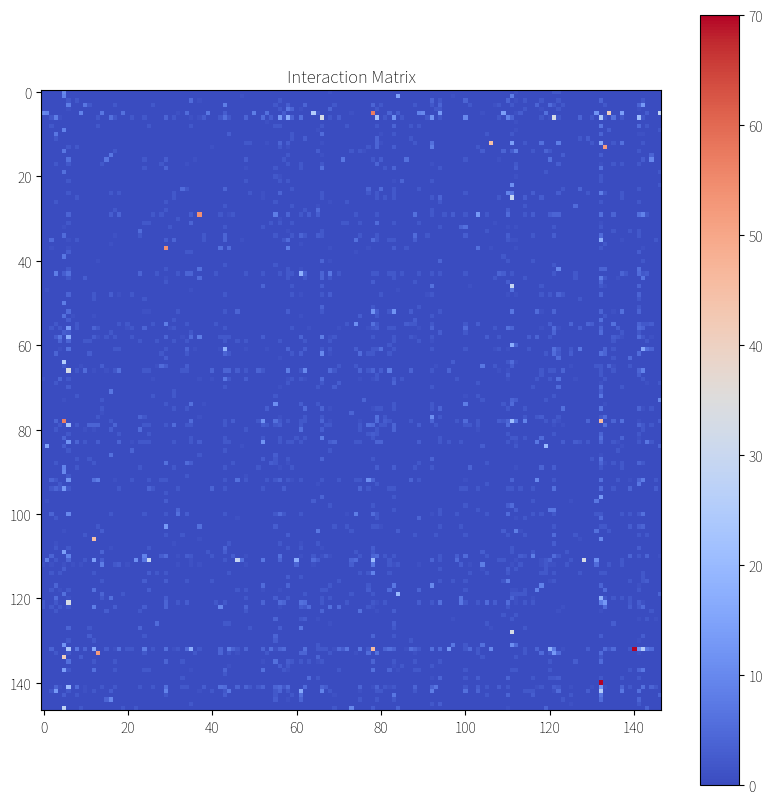

In [323]:
plt.figure(figsize=(10, 10))

plt.imshow(matrix_sum, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Interaction Matrix')
plt.show()

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the Network of Users and Articles 可視化使用者與文章的網路</div>

In [324]:
# 產生隨機的顏色，畫圖使用
def random_color():
    r = lambda: random.randint(0, 255)
    return '#%02X%02X%02X' % (r(), r(), r())


def mat_present_graph(
    mat: np.array,
    node_id: list,
    node_type: list = None,
    node_value: list = None,
    directed=True,
    edge_color=None,
    scale=1
) -> Network:
    # 有方向或無方向
    if not directed:
        # 矩陣對稱
        if (mat == mat.transpose()).all():
            print('matrix is Symmetric')
        # 矩陣不對稱
        else:
            print('matrix is not Symmetric')

    # 設定節點的類別及顏色
    # 沒有分節點類別
    if node_type is None:
        c = random_color()
        node_colors = [c for i in range(len(node_id))]
        node_type = [" " for i in range(len(node_id))]
    # 有分節點類別
    else:
        node_color_map = {}
        for i in set(node_type):
            # 幫每個類別產生一個顏色
            while True:
                c = random_color()
                if c not in node_color_map.values():
                    break
            node_color_map[i] = c
        node_colors = [node_color_map[i] for i in node_type]

    # 如果沒有給邊的顏色，隨機產生一個
    if edge_color is None:
        edge_color = random_color()

    # 如果沒有給 node 值，就都分配 1
    if node_value is None:
        node_value = [1 for i in range(len(node_id))]

    # 建立圖
    net = Network(notebook=True, directed=directed, cdn_resources='in_line')

    titles_list = []
    for i, j in zip(node_id, node_type):
        titles_list.append(str(i) + ":" + str(j))

    net.add_nodes(
        nodes=node_id,
        value=node_value,
        label=node_id,
        title=titles_list,
        color=node_colors
    )

    for row in range(len(node_id)):
        for col in range(len(node_id)):
            if mat[row][col] > 0.:
                net.add_edge(
                    node_id[row], node_id[col], width=mat[row][col] / scale, color=edge_color, title=mat[row][col]
                )
    net.repulsion()
    return net

In [325]:
# 定義發文者（po）、評論者(cmt)、兩者兼具(both)
node_type = []

cmt_list = pos_comment['commenters'].unique().tolist()
po_list = pos_comment['artPoster'].unique().tolist()
both_list = list(set(cmt_list) & set(po_list))

for p in pers:
  if p in both_list:
    node_type.append('both')

  elif p in cmt_list:
    node_type.append('cmt')

  elif p in po_list:
    node_type.append('po')

In [326]:
# 繪製網路圖
net = mat_present_graph(matrix_sum, pers, node_type=node_type, directed=False, edge_color='grey', scale=10)

net.show('plot/Network2.html')

matrix is Symmetric
plot/Network2.html


In [335]:
# Find Top 10 Commenters
top_users = pd.DataFrame(pos_comment.groupby('commenters').sum('score')['score'].sort_values(ascending=False).head(10))
top_users

,score
commenters,
strlen,473
DrTech,308
peter080808,224
dosiris,157
xephon,126
cuteSquirrel,114
kinki999,113
icedog122,108
suntw,101


In [336]:
# Find Top 10 Posters
top_posters = pd.DataFrame(pos_comment.groupby('artPoster').sum('score')['score'].sort_values(ascending=False).head(10))
top_posters

,score
artPoster,
DrowningPool,295
hvariables,245
yakimochi,143
Severine,126
Kai877,125
Kevinsun,79
xa9277178,70
qwe22992168,69
qk123,67


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 5: Eigenvector Centrality 特徵向量中心性</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Eigenvector Centrality 計算特徵向量中心性</div>

In [337]:
# nx.Graph(mat_s): 將對稱矩陣 mat_s 轉換為 NetworkX 的無向圖對象
# nx.eigenvector_centrality: 計算圖中每個節點的特徵向量中心性
# max_iter=10000: 演算法的最大迭代次數，以確保演算法收斂。 特徵向量中心性的計算是一個迭代過程，可能需要多次迭代才能達到穩定狀態。
eigen_vector = np.array(list(nx.eigenvector_centrality(nx.Graph(matrix_sum), max_iter = 10000).values()))

# 將特徵向量中心性值歸一化到 [0, 1] 範圍內
eigen_vector = (eigen_vector - np.min(eigen_vector)) / (np.max(eigen_vector) - np.min(eigen_vector))

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the Eigenvector Centrality 可視化特徵向量中心性</div>

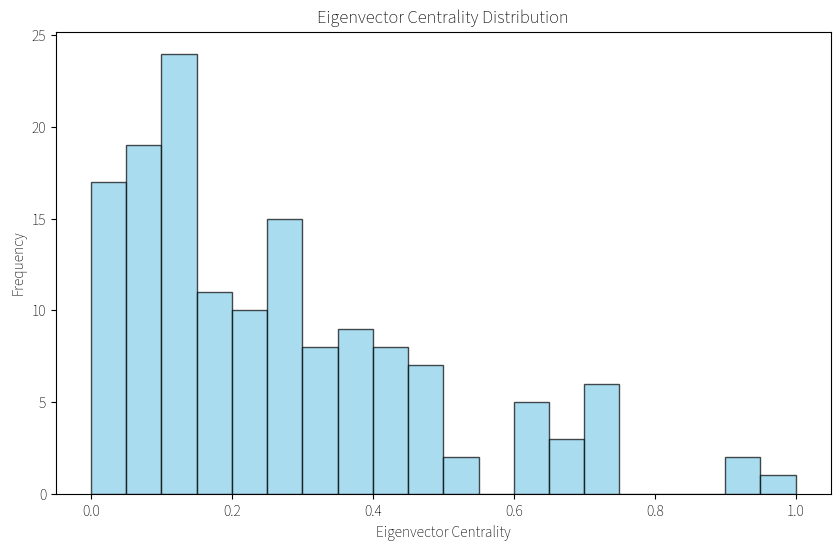

In [338]:
# 繪製特徵向量中心性的直方圖
plt.figure(figsize=(10, 6))
plt.hist(eigen_vector, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Eigenvector Centrality Distribution')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.show()

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Assign the Value to the Nodes 將值分配給節點</div>

In [339]:
node_value = []
q = np.quantile(eigen_vector, [.2,.4,.6,.8])

for i in eigen_vector:
  # 越重要分數越高
  if i > q[3]:
    node_value.append(25)
  elif i >q[2]:
    node_value.append(20)
  elif i>q[1]:
    node_value.append(15)
  elif i>q[0]:
    node_value.append(10)
  else:
    node_value.append(5)

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the Network of Users and Articles with Eigenvector Centrality 可視化使用者之間的網路與特徵向量中心性</div>

In [340]:
net = mat_present_graph(mat = matrix_sum,node_id = pers,node_type = node_type,node_value = node_value,directed=False, scale=10)
net.show('plot/Network3.html')

matrix is Symmetric
plot/Network3.html


In [345]:
# Find Top 10 Users with Eigenvector Centrality
eigen_vector_df = pd.DataFrame(eigen_vector, index=pers, columns=['eigenvector_centrality'])
eigen_vector_df.sort_values(by='eigenvector_centrality', ascending=False).head(10)

,eigenvector_centrality
strlen,1.000000
xephon,0.931566
DrowningPool,0.927801
dosiris,0.745209
hvariables,0.734714
icedog122,0.721300
addy7533967,0.721260
kinki999,0.708199
qwe22992168,0.705115
jc761128,0.688165


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 6: PageRank Algorithm PageRank 演算法</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the PageRank 計算 PageRank</div>

In [346]:
# Digraph 設定有向圖
# nx.DiGraph(mat): 使用 NetworkX 的 DiGraph 類別將矩陣 mat 轉換為有向圖物件。
# nx.pagerank(): 計算圖中每個節點的 PageRank 值
pagerank = np.array(list(nx.pagerank(nx.DiGraph(matrix)).values()))

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the PageRank 可視化 PageRank</div>

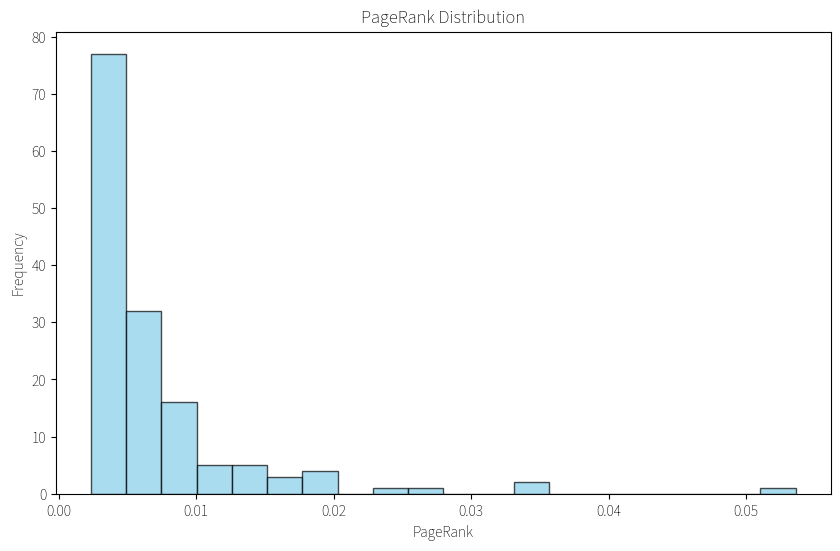

In [347]:
# 繪製 PageRank 的直方圖
plt.figure(figsize=(10, 6))
plt.hist(pagerank, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('PageRank Distribution')
plt.xlabel('PageRank')
plt.ylabel('Frequency')
plt.show()

In [348]:
net = mat_present_graph(mat=matrix, node_id=pers, node_type=node_type, node_value=(pagerank * 1000).tolist(), scale=10)

net.show('plot/Network4.html')

plot/Network4.html


In [349]:
# Find Top 10 Users with PageRank
pagerank_df = pd.DataFrame(pagerank, index=pers, columns=['pagerank'])
pagerank_df.sort_values(by='pagerank', ascending=False).head(10)

,pagerank
DrowningPool,0.053594
hvariables,0.035429
jackliao1990,0.035413
yakimochi,0.026472
Severine,0.023469
kcbill,0.019736
kech9111,0.019620
dosiris,0.018555
createlight,0.017934
Kai877,0.017205


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 7: Hit Score</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Hit Score 計算 Hit Score</div>

In [350]:
# nx.hits 計算圖中每個節點的 Hub 和 Authority 值。 HITS 演算法將每個節點分為兩種角色：
# Hub： 一個好的 Hub 節點連結到許多 Authority 節點。
# Authority： 一個好的 Authority 節點被許多 Hub 節點連結到。

# out_：每個節點的 Hub 值。
# in_：每個節點的 Authority 值。

out_, in_ = nx.hits(nx.DiGraph(matrix), max_iter=100)

In [351]:
out_ = np.array(list(out_.values()))
out_q = np.quantile(out_,[.2,.4,.6,.8])
out_q

array([0.        , 0.00033554, 0.0022185 , 0.00761474])

In [352]:
in_ = np.array(list(in_.values()))
in_q = np.quantile(in_, [.2, .4, .6, .8])
in_q

array([0.00079253, 0.00235355, 0.00478079, 0.00910968])

In [353]:
node_value_out = []

# 根據 Hub 值設定節點大小
for i in out_:
  if i > out_q[3]:
    node_value_out.append(25)
  elif i >out_q[2]:
    node_value_out.append(20)
  elif i>out_q[1]:
    node_value_out.append(15)
  elif i>out_q[0]:
    node_value_out.append(10)
  else:
    node_value_out.append(5)

In [354]:
node_value_in = []

# 根據 Authority 值設定節點大小
for i in in_:
  if i > in_q[3]:
    node_value_in.append(25)
  elif i >in_q[2]:
    node_value_in.append(20)
  elif i>in_q[1]:
    node_value_in.append(15)
  elif i>in_q[0]:
    node_value_in.append(10)
  else:
    node_value_in.append(5)

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the Out Score 可視化 Out Score</div>

In [355]:
net = mat_present_graph(mat=matrix, node_id=pers, node_type=node_type, node_value=node_value_out, scale=10)

net.show('plot/Network5.html')

plot/Network5.html


In [358]:
# Find top 10 user with highest out score
top_out = np.argsort(out_)[::-1][:10]
top_out_df = pd.DataFrame(out_[top_out], index=pers[top_out], columns=['out_score'])
top_out_df.sort_values(by='out_score', ascending=False)

,out_score
strlen,0.193528
DrTech,0.108505
peter080808,0.055551
dosiris,0.044491
icedog122,0.031132
qwe22992168,0.027827
xephon,0.027509
kinki999,0.026745
cl3bp6,0.022544
DDDDRR,0.022333


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the In Score 可視化 In Score</div>

In [359]:
net = mat_present_graph(mat=matrix, node_id=pers, node_type=node_type, node_value=node_value_in, scale=10)

net.show('plot/Network6.html')

plot/Network6.html


In [360]:
# Find top 10 user with highest in score
top_in = np.argsort(in_)[::-1][:10]
top_in_df = pd.DataFrame(in_[top_in], index=pers[top_in], columns=['in_score'])
top_in_df.sort_values(by='in_score', ascending=False)

,in_score
hvariables,0.098812
xa9277178,0.073645
DrowningPool,0.059235
yakimochi,0.038397
Kai877,0.029528
sxy67230,0.026463
qk123,0.023073
TyuzuChou,0.019305
xephon,0.017958
zzzz8931,0.016647


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 8: Betweenness Centrality</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Betweenness Centrality 計算 Betweenness Centrality</div>

In [361]:
bet = np.array(list(nx.betweenness_centrality(nx.Graph(matrix_sum)).values()))
bet = (bet-np.min(bet))/(np.max(bet)-np.min(bet))
bet_q = np.quantile(bet,[.2,.4,.6,.8])

In [362]:
node_value = []

for i in bet:
  if i > bet_q[3]:
    node_value.append(25)
  elif i > bet_q[2]:
    node_value.append(20)
  elif i>bet_q[1]:
    node_value.append(15)
  elif i>bet_q[0]:
    node_value.append(10)
  else:
    node_value.append(5)

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the Betweenness Centrality 可視化 Betweenness Centrality</div>

In [363]:
net = mat_present_graph(mat=matrix_sum, node_id=pers, node_type=node_type, directed=False,node_value=node_value, scale=10)

net.show('plot/Network7.html')

matrix is Symmetric
plot/Network7.html


In [364]:
# Find top 10 user with highest betweenness centrality
top_bet = np.argsort(bet)[::-1][:10]
top_bet_df = pd.DataFrame(bet[top_bet], index=pers[top_bet], columns=['betweenness_centrality'])
top_bet_df.sort_values(by='betweenness_centrality', ascending=False)

,betweenness_centrality
strlen,1.000000
DrTech,0.563652
peter080808,0.560010
xephon,0.506010
peter98,0.494731
DrowningPool,0.391169
addy7533967,0.389062
hvariables,0.342842
jc761128,0.313779
Severine,0.301981


# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 9: Calculate the Largest Subgraph 計算最大子圖</div>

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Largest Subgraph 計算最大子圖</div>

In [365]:
# 計算max subgraph
G = nx.Graph(matrix_sum)
G_sub = sorted(nx.connected_components(G), key=len, reverse=True)
G_max_sub = G.subgraph(G_sub[0])

# 重新定義 mat
sub_matrix = nx.adjacency_matrix(G_max_sub).todense()
node_idx = list(G_max_sub.nodes)
sub_pers = pers[node_idx]

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Visualize the Largest Subgraph 可視化最大子圖</div>

In [366]:
net = mat_present_graph(mat=sub_matrix, node_id=sub_pers, directed=False, scale=10)

net.show('plot/Network8.html')

matrix is Symmetric
plot/Network8.html


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Transitivity 計算圖的聚集性</div>

In [367]:
nx.transitivity(nx.Graph(sub_matrix))

0.2599668110252155

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Density 計算密度</div>

In [368]:
nx.density(nx.Graph(sub_matrix))

0.09834671705243268

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Average Clustering Coefficient 計算平均聚集係數</div>

In [369]:
nx.average_clustering(nx.Graph(sub_matrix))

0.33690158377969626

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Distance 計算距離</div>

In [370]:
nx.average_shortest_path_length(nx.Graph(sub_matrix))

2.229475673122343

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Diameter 計算直徑</div>

In [371]:
nx.diameter(nx.Graph(sub_matrix))

4

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Calculate the Clustering 計算聚集性</div>

In [372]:
nx.average_clustering(nx.Graph(sub_matrix))

0.33690158377969626

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Merge All the Results 合併所有結果</div>

In [376]:
user_score_df = pd.DataFrame({
    'eigenvector_centrality': eigen_vector,
    'pagerank': pagerank,
    'out_score': out_,
    'in_score': in_,
    'betweenness_centrality': bet
}, index=pers)

user_score_df

,eigenvector_centrality,pagerank,out_score,in_score,betweenness_centrality
AAAB,0.096992,0.003329,-0.000000,0.006443,0.006082
Angels5566,0.037291,0.007070,-0.000000,0.007942,0.009458
Cartier,0.351408,0.008372,0.000949,0.006763,0.013297
DDDDRR,0.486406,0.003141,0.022333,0.000950,0.102300
DamnDre,0.302144,0.007476,0.000732,0.002322,0.012563
...,...,...,...,...,...
yakimochi,0.687750,0.026472,0.003119,0.038397,0.124237
ynlin1996,0.278962,0.009300,-0.000000,0.011558,0.063832
yogo3388,0.259067,0.008320,0.000772,0.007595,0.007808
zxcvxx,0.114499,0.003753,-0.000000,0.000784,0.001776


In [378]:
# Find Top 10 Articles Name and URL
merge_commenters = pd.merge(df[df['artUrl'].isin(top_comments_df.head(10).index)][['artTitle', 'artUrl', 'artPoster']], top_comments_df.head(10), left_on='artUrl', right_index=True)

# Merge with the score
merge_commenters = pd.merge(merge_commenters, user_score_df, left_on='artPoster', right_index=True)
merge_commenters.sort_values(by='commenters', ascending=False).head(10)

,artTitle,artUrl,artPoster,commenters,eigenvector_centrality,pagerank,out_score,in_score,betweenness_centrality
963,[新聞]蔡執政8年台股市值、指數雙翻倍,https://www.ptt.cc/bbs/Stock/M.1701225874.A.73E.html,Kevinsun,1235,0.249915,0.014003,-0.000000,0.005189,0.007767
990,[新聞]國發會：蔡英文執政股市漲幅逾100％馬政,https://www.ptt.cc/bbs/Stock/M.1703159179.A.E08.html,humbler,1061,0.341621,0.006948,0.000335,0.006305,0.019640
1257,[新聞]自找的！日媒評論：習近平毀了中國科技業,https://www.ptt.cc/bbs/Stock/M.1713712740.A.E47.html,Su22,715,0.230398,0.006817,-0.000000,0.004302,0.046439
1720,[請益]有學歷沒能力怎麼辦,https://www.ptt.cc/bbs/Tech_Job/M.1685688709.A.54B.html,robber,713,0.020542,0.002563,-0.000000,0.000188,0.000476
726,[新聞]AI商機恐成史上最大泡沫,https://www.ptt.cc/bbs/Stock/M.1689653411.A.231.html,hvariables,516,0.734714,0.035429,0.000312,0.098812,0.342842
811,[新聞]ChatGPT的「幻覺」根本無法解,https://www.ptt.cc/bbs/Stock/M.1691590964.A.313.html,breeze0817,499,0.107347,0.005681,0.002196,0.006399,0.000327
1866,[新聞]被AI誤認是紙箱！南韓工人慘遭機器夾爪「,https://www.ptt.cc/bbs/Tech_Job/M.1699485847.A.546.html,cjol,482,0.257017,0.007882,-0.000000,0.008711,0.014365
1613,[新聞]「當92%的晶片都依賴台灣，你別無選擇！,https://www.ptt.cc/bbs/Tech_Job/M.1677244332.A.87C.html,peter080808,470,0.465275,0.006621,0.055551,0.002610,0.560010
859,[新聞]市場需求已被滿足傳微軟下修輝達H100訂單,https://www.ptt.cc/bbs/Stock/M.1695112441.A.C61.html,LieTo,439,0.132025,0.005318,0.000296,0.004135,0.001544
813,Re:[新聞]ChatGPT的「幻覺」根本無法解,https://www.ptt.cc/bbs/Stock/M.1691634339.A.FC5.html,xa9277178,437,0.041974,0.002677,-0.000000,0.073645,0.000000


## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Find the Top 10 Users and Articles and their interactions 找出前10名用戶和文章及其互動</div>

In [395]:
top_article_posters = merge_commenters.sort_values(by='commenters', ascending=False).head(10)['artPoster'].values
top_article_posters

array(['Kevinsun', 'humbler', 'Su22', 'robber', 'hvariables',
       'breeze0817', 'cjol', 'peter080808', 'LieTo', 'xa9277178'],
      dtype=object)

In [398]:
# Find Top 10 Users Name and also leave comments
top_article_poster_also_have_post_comment = clear_df[clear_df['commenters'].isin(merge_commenters.sort_values(by='commenters', ascending=False).head(10)['artPoster'].values)]['commenters'].unique()
top_article_poster_also_have_post_comment

array(['peter080808', 'LieTo', 'Su22', 'breeze0817', 'humbler', 'robber',
       'cjol', 'hvariables'], dtype=object)

In [399]:
# The user that is top poster but not have any comment
top_poster_not_commenter = np.setdiff1d(top_article_posters, top_article_poster_also_have_post_comment)
top_poster_not_commenter

array(['Kevinsun', 'xa9277178'], dtype=object)

## <div style="font-family: 'Lucida Sans Unicode', sans-serif; font-size: 18px; color: #4A235A; background-color: #D7BDE2; text-align: left; padding: 10px; border-left: 5px solid #7D3C98; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2); margin-bottom: 10px;">Check the article of 'Kevinsun', 'xa9277178' 檢查 'Kevinsun', 'xa9277178' 的文章</div>

In [400]:
df[df['artPoster'].isin(top_poster_not_commenter)]

system_id                                                artUrl  \
813        814  https://www.ptt.cc/bbs/Stock/M.1691634339.A.FC5.html   
963        964  https://www.ptt.cc/bbs/Stock/M.1701225874.A.73E.html   

                     artTitle              artDate  artPoster artCatagory  \
813  Re:[新聞]ChatGPT的「幻覺」根本無法解  2023-08-10 10:25:36  xa9277178       Stock   
963       [新聞]蔡執政8年台股市值、指數雙翻倍  2023-11-29 10:44:32   Kevinsun       Stock   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    artContent  \
813                                                                                                      純論AI的話 這個問題是一定可以被解決的\n\n討論chatGPT肯定是無解 頂多提升準確度 提升到你認知不到「錯覺」\n\n我自己是覺得用錯覺這個詞來闡述這個問題 好像滿奇怪的\n\n簡單思考一下就知道了\n\n假設AI是個人 他肯定會有他自己的認知\n\n他的認知來自於他的資料庫\n\n但誰能保證資料庫裡面的資料100%是對的？\n\n畢竟資料庫的資料也是人為產出，或是他的開發者灌入的\n\n最終都會限縮於：「什麼是對的」的這個命題\n\n並且有一個很弔詭的事情是這樣的\n\n「你憑什麼認為AI給出的答案是錯的，便稱作幻覺，難道就是基於人類的共同認知嗎？」\n\n這個東西討論到後面就變成哲學問題了，所以不贅述。\n\n但核心概念是這樣\n\n一個人，老師，教授，都會有認知錯誤，都會出錯，為什麼人工智能不會\n\n基於什麼樣的原因，你覺得他能掌握100%的真理，這樣想想不就知道了\n\n但是基於網速科技提升，資料處理能力加強，程序優化肯定能再進步\n\n回歸前面所說的，只要把AI的範圍侷限性拉大，就能提升正確率阿\n\n比如你設定這個AI就叫做金融投資機器人，甚至叫做台灣金融投資機器人\n\n並且串聯所有台灣銀行、投資平台、各大當鋪的內部資料\n\n那肯定是強的沒話說。\n\n\n你期待一個AI機器人，能貫通世界上所有領域的事情，給你都是正確的答案\n\n那肯定是不切實際。\n\n\n更何況一定一堆人是這樣：「請給我一個完美的python程序。」\n\n「幹，你這個根本不完美」\n\n你自己都定義不出來，都不知道什麼叫做完美了，AI怎麼可能會知道\n\n你怎麼連話都說不清楚~\n\n\n我自己是覺得AI很神啦，沒有戰文組的意思，但對於邏輯思考，表述能力不好的人來說\n\n可能不好用\n\n我在某平台上面，買了好幾次程式課，每次都沒有耐心看完，把作業做完。\n\nchatgpt用了兩三天，已經弄出了兩個簡單的小程式，改善我工作上面的需求\n\n平心而論，我就算認真把課程都上完，自己寫，寫個1個月，大概都弄不出來。\n\nAI最強大的，就是他給你的資訊裡面，是有一定程度的正確率的，\n\n你本來就要能分辨，什麼東西對你有用，然後再引導他幫助你，給出更多有用的資訊，\n\n最後幫助你完成你的目標。\n   
963  原文標題：\n蔡執政8年 台股市值、指數雙翻倍\n\n\n\n原文連結：\nhttps://ec.ltn.com.tw/article/paper/1617949\n發布時間：\n2023/11/29 05:30\n\n\n\n記者署名：\n自由時報 記者王孟倫\n\n原文內容：\n\n〔記者王孟倫／台北報導〕闊別三十一年，台股加權指數在昨日收盤後，超越香港恆生指\n數中午收盤；統計蔡政府執政八年來，台股指數從二○一六年的八七六三點倍增至昨日收\n盤的一七三四一點，市值也從二十七．二兆倍增至五十四．九兆元。金管會官員分析，從\n二○一八年美中貿易戰一直打到科技戰，台灣產業的營收及獲利持續攀升、基本面佳，也\n反映在股票上，而以中企地產、金融股為主的港股大受衝擊，因此形成交叉局面。\n\n經濟櫥窗表現優 打臉在野攻訐\n總統大選將屆，在野黨政治人物常批評蔡政府執政以來，經濟表現不佳；但若以「經濟櫥\n窗」的台股為例，昨收在一七三四一．二五點，不管是蔡總統二○一六年五月十九日上任\n前一日收盤指數八○九五．九八點，或是當年底的八七六三點，漲幅都超過一倍。\n\n台股昨日收盤指數超越港股中午收盤，雖然港股收盤指數仍小贏台股，但金管會強調，這\n具有多項實質意義，也是一九九二年以來，台股指數首次贏過港股。\n\n官員指出，台港股市最大分水嶺是二○一八年美中貿易戰，兩邊開始出現分歧點；以半導\n體、科技股為主的台股，趨勢就是向上，而香港股市受到中國拖累，因中企股占恆生指數\n比重達三分之二，當中國經濟踩煞車、房產地雷連環爆，趨勢自然向下。\n\n「台股大盤指數超越港股，是合理也是必然的！」台新投顧副總經理黃文清說，投資人是\n看大盤指數，台灣是以電子股等為主體，今、明年又有AI（人工智慧）題材發酵，凸顯台\n股優勢，而港股受到美中不斷擴大各領域競爭的衝擊，恐難重返榮耀。\n\n另從二○一六年至二○二三年十一月二十八日，八個年度有六年是台股表現贏過港股，且\n台股有六個年度年漲幅是雙位數正成長。\n\n心得/評論：\n記得我小時候吧，長輩對於香港人總有種「香港人不知道在跩什麼」的印象，那時候就覺\n得香港是個到處都是錢的地方，而香港那時候97年主權轉移，世人一片看好跟中國加強經\n濟聯繫，一定會逆風高揮（馬英九看來也是這麼想的）。沒想到到了近10年台灣跟香港的\n命運會差那麼多，就是2018年一個路線選擇的不同，跟著美國走跟跟著中國走的不同，讓\n台股現在賺的飽飽飽，港股現在被腰斬（幫投資港股的人ＱＱ\n   

                                                                                                                                                                                                                                                                                                                                             

# <div style="font-family: 'Garamond', serif; font-size: 22px; color: #ffffff; background-color: #34568B; text-align: center; padding: 15px; border-radius: 10px; border: 2px solid #FF6F61; box-shadow: 0 6px 12px rgba(0, 0, 0, 0.3); margin-bottom: 20px;">Step 10: Conclusion 結論</div>

我們發現關於AI相關的議題有以下發現：

在 Top 10 文章內，只有一個用戶在用戶之間的互動中排名前十，該用戶是hvariables，這應該是一個非常活躍的用戶，他的文章受到了很多用戶的關注。

我們也發現 PTT 最多留言的文章與其作者分別是

| 文章標題                     | 作者         | 最多留言數 | 特徵向量中心性  | PageRank | Out Score | In Score | Betweenness Centrality |
|--------------------------|------------|-------|----------|----------|-----------|----------|------------------------|
| [新聞]蔡執政8年台股市值、指數雙翻倍      | Kevinsun   | 1235  | 0.249915 | 0.014003 | -0.000000 | 0.005189 | 0.007767               |
| [新聞]國發會：蔡英文執政股市漲幅逾100％馬政 | humbler    | 1061  | 0.341621 | 0.006948 | 0.000335  | 0.006305 | 0.019640               |
| [新聞]自找的！日媒評論：習近平毀了中國科技業  | Su22       | 715   | 0.230398 | 0.006817 | -0.000000 | 0.004302 | 0.046439               |
| [請益]有學歷沒能力怎麼辦            | robber     | 713   | 0.020542 | 0.002563 | -0.000000 | 0.000188 | 0.000476               |
| [新聞]AI商機恐成史上最大泡沫         | hvariables | 516   | 0.734714 | 0.035429 | 0.000312  | 0.098812 | 0.342842               |

在這些文章中，hvariables 除了 out score 外，其他指標都是前 10 名，這顯示了他在社群中的重要性。

但是其他人的文章雖然有很多留言，但在其他指標上並不是很突出。有個很可疑的是 'Kevinsun', 'xa9277178' 從未在文章下留言，但是他們的文章卻有很多留言。此外他們身分都是記者，且 'Kevinsun' 的文章是與政治相關，我們推測他們可能身分受到外部影響而發文，故不會在其他文章下留言。